In [2]:
import numpy as np

a = np.arange(0, 10, 0.5)
print(len(a), a)  # 0~10까지 0.5 간격으로 값 생성
data = np.sin(a)
print(data)
print(len(data))

20 [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[ 0.          0.47942554  0.84147098  0.99749499  0.90929743  0.59847214
  0.14112001 -0.35078323 -0.7568025  -0.97753012 -0.95892427 -0.70554033
 -0.2794155   0.21511999  0.6569866   0.93799998  0.98935825  0.79848711
  0.41211849 -0.07515112]
20


In [3]:
# data=[1,2,3,4,5,6,7,8,9,10]
timestep = 3  # t-3, t-2, t-1 데이터를 이용하여 t 시점의 값을 예측

X, y = [], []

for i in range(timestep, len(data)):
    X.append(np.array([data[i - j] for j in range(timestep, 0, -1)]))
    y.append(data[i])

print(X)
print(y)

[array([0.        , 0.47942554, 0.84147098]), array([0.47942554, 0.84147098, 0.99749499]), array([0.84147098, 0.99749499, 0.90929743]), array([0.99749499, 0.90929743, 0.59847214]), array([0.90929743, 0.59847214, 0.14112001]), array([ 0.59847214,  0.14112001, -0.35078323]), array([ 0.14112001, -0.35078323, -0.7568025 ]), array([-0.35078323, -0.7568025 , -0.97753012]), array([-0.7568025 , -0.97753012, -0.95892427]), array([-0.97753012, -0.95892427, -0.70554033]), array([-0.95892427, -0.70554033, -0.2794155 ]), array([-0.70554033, -0.2794155 ,  0.21511999]), array([-0.2794155 ,  0.21511999,  0.6569866 ]), array([0.21511999, 0.6569866 , 0.93799998]), array([0.6569866 , 0.93799998, 0.98935825]), array([0.93799998, 0.98935825, 0.79848711]), array([0.98935825, 0.79848711, 0.41211849])]
[0.9974949866040544, 0.9092974268256817, 0.5984721441039564, 0.1411200080598672, -0.35078322768961984, -0.7568024953079282, -0.977530117665097, -0.9589242746631385, -0.7055403255703919, -0.27941549819892586, 0.

In [4]:
# 신경망에 입력하기 위해 차원 변경
X, y = np.array(X).reshape(len(X), 3, 1), np.array(y).reshape(len(y), 1)
print(X.shape)
print(y.shape)

(17, 3, 1)
(17, 1)


In [5]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

np.random.seed(0)

model = Sequential()
# units 출력노드수
model.add(SimpleRNN(units=10, input_shape=(3, 1)))
model.add(Dense(5, activation="relu"))
model.add(Dense(1, activation="linear"))
model.compile(loss="mse", optimizer="sgd")

model.summary()

c:\python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
from datetime import datetime
import tensorflow as tf

logdir = "c:/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
logdir

'c:/logs/20240401-124459'

In [7]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
history = model.fit(X, y, epochs=1000, callbacks=[tensorboard_callback])
# cmd에서 실행
# tensorboard --logdir=c:/logs/20240401-124459

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - loss: 0.6684
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6304
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5963
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5649
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5364
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.5106
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4869
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4652
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4456
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4271
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4096
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3929
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3771
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3622
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3483
Epo

In [8]:
model.evaluate(X, y) # 오차

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 9.6977e-04


0.0009697737987153232

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


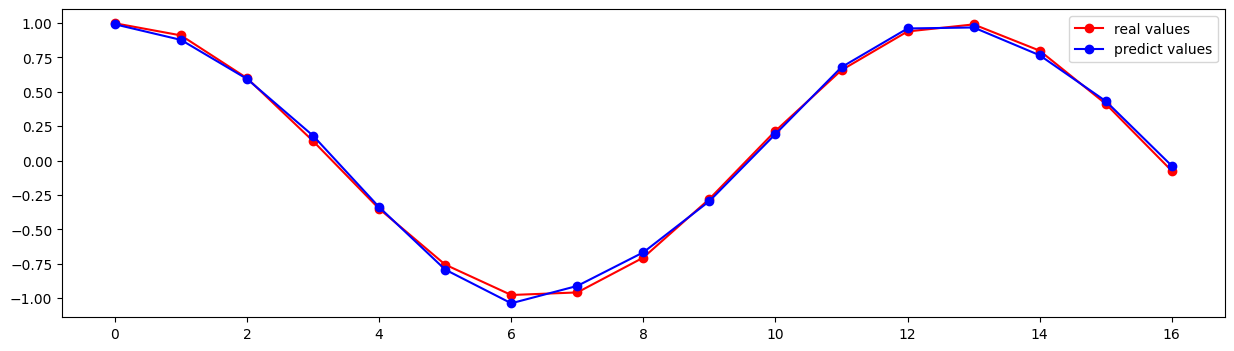

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 4))
plt.plot(data[3:], "ro-", label="real values")  # 실제값

# 예측값
plt.plot(model.predict(X), "bo-", label="predict values")
plt.legend()
plt.show()